In [ ]:
#Problem Statement

#To build a machine learning model that can predict the Stress Level of a developer using performance, behavioral, and productivity metrics.

In [29]:
# -----------------------------------------------------------
# AI-Driven Prediction of Developer Stress Levels
# Full End-to-End Machine Learning Project
# -----------------------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#load dataset csv file
df=pd.read_csv("AI_Developer_Performance_Extended_1000.csv")
df

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,660,14,13,0,5.5,21,80,2,30,5.2,20,5
996,9,484,13,11,1,8.8,34,78,0,39,4.7,37,1
997,2,128,4,0,3,8.7,42,74,3,49,2.8,5,7
998,8,266,5,3,1,5.7,48,51,0,63,11.8,9,0


In [23]:
df.head()  # first 5 rows and columns in dataset

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9


In [24]:
df.tail()     # last 5 rows and columns in dataset 

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
995,10,660,14,13,0,5.5,21,80,2,30,5.2,20,5
996,9,484,13,11,1,8.8,34,78,0,39,4.7,37,1
997,2,128,4,0,3,8.7,42,74,3,49,2.8,5,7
998,8,266,5,3,1,5.7,48,51,0,63,11.8,9,0
999,8,604,16,15,3,6.9,26,90,4,30,4.4,11,1


In [28]:
df.shape    # Shape of dataset

(1000, 13)

In [3]:
df.info()   # infromation of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [4]:
df.isna().sum()  #Check missing values

Hours_Coding           0
Lines_of_Code          0
Bugs_Found             0
Bugs_Fixed             0
AI_Usage_Hours         0
Sleep_Hours            0
Cognitive_Load         0
Task_Success_Rate      0
Coffee_Intake          0
Stress_Level           0
Task_Duration_Hours    0
Commits                0
Errors                 0
dtype: int64

In [5]:
df.describe()       # Summary statistics

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.84000,356.23400,9.876000,7.153000,2.961000,6.465800,56.933000,56.578000,3.368000,66.410000,8.700100,17.253000,4.544000
std,3.15854,188.15535,5.796052,5.468226,2.021278,1.439529,21.767506,20.814879,2.342234,21.865452,5.992891,10.836901,2.820997
min,1.00000,26.00000,0.000000,0.000000,0.000000,4.000000,20.000000,30.000000,0.000000,30.000000,0.500000,1.000000,0.000000
25%,3.00000,209.50000,5.000000,2.000000,1.000000,5.200000,38.000000,37.000000,1.000000,48.000000,4.000000,9.000000,2.000000
50%,6.00000,332.00000,10.000000,7.000000,3.000000,6.400000,57.000000,55.500000,3.000000,66.000000,7.450000,14.000000,5.000000
75%,9.00000,480.50000,15.000000,12.000000,5.000000,7.700000,76.000000,74.000000,5.000000,86.000000,12.000000,23.000000,7.000000
max,11.00000,993.00000,19.000000,19.000000,6.000000,9.000000,94.000000,100.000000,7.000000,100.000000,27.500000,50.000000,9.000000


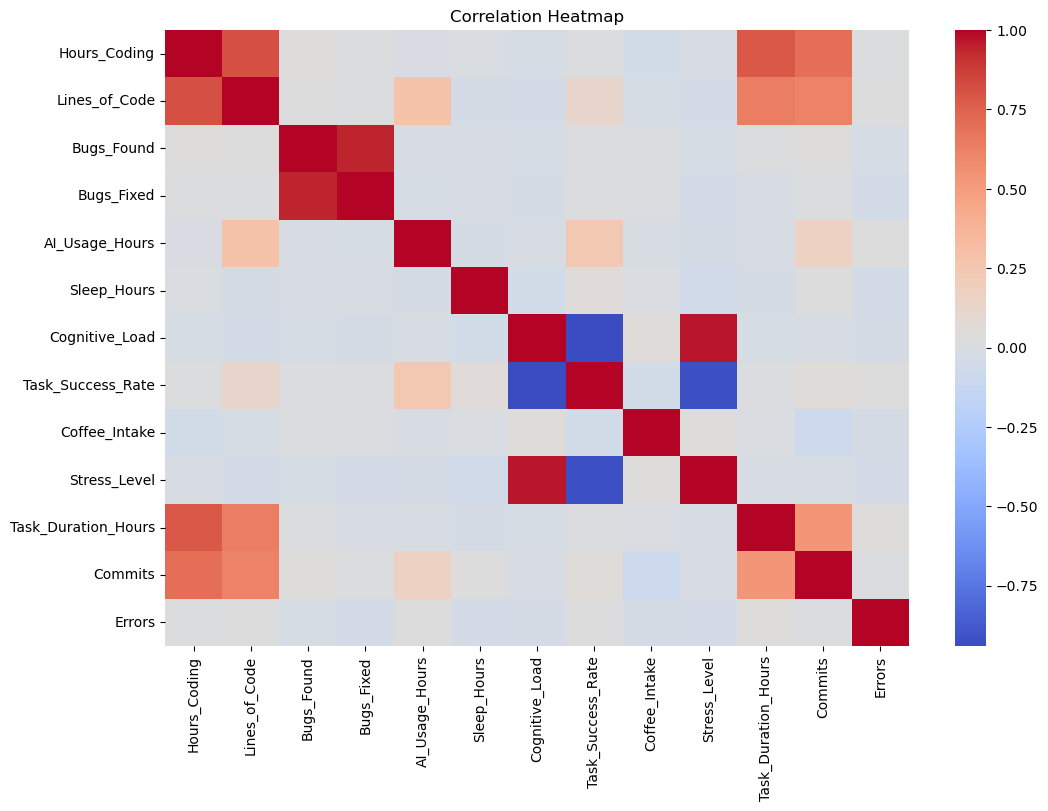

In [6]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
#Feature Selection
target = "Stress_Level"
X = df.drop(columns=[target])
y = df[target]


In [30]:
#Train the Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [36]:
y_pred_lr = lr.predict(X_test_scaled)        # Predictions of data
y_pred_lr

array([ 73.60057379,  94.33626663,  92.7310387 ,  69.50929704,
        51.31661121,  98.31461025,  61.08672148,  54.18353447,
        61.68369649,  93.16066811,  62.72283553,  65.67394796,
        55.43712123,  42.82860598,  67.05604298,  97.19858599,
        73.6323938 ,  46.86063094,  39.11070479,  29.25947897,
        58.60459104,  85.69915327,  70.52470316,  72.95700141,
        41.66195067,  72.31503438,  35.65455036,  86.38516766,
        55.47894003,  86.93607877,  85.64428093,  45.34239318,
        70.06604775,  33.47710995,  34.05970979,  61.45821736,
        42.41842621,  42.03152478,  75.91953507,  74.98708863,
        94.03642987,  49.39512375,  34.87036478,  74.28280941,
        39.43751902,  54.31462385,  99.05225369,  74.31769054,
        77.21053481,  56.73944612,  76.46852394,  64.60746993,
        44.36661812,  61.89318034,  68.71053472,  58.06475045,
        54.23002432,  45.64521772,  98.78951948,  77.56987908,
        92.51139605,  49.09106256,  61.09423884,  54.58

In [33]:
#Evaluate Linear Regression Model
print("Linear Regression Performance")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Performance
R² Score: 0.9261780111559854
MAE: 4.777256806007201
RMSE: 5.592443454667665


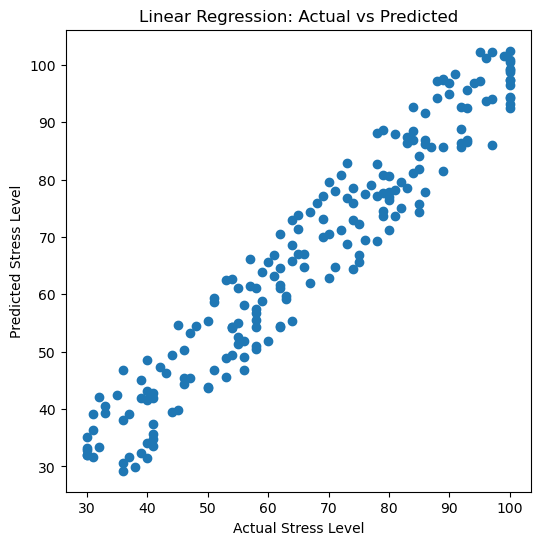

In [34]:
#Predicted Plot using scatter plot 
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [35]:
#Coefficients 
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df


,Feature,Coefficient
6,Cognitive_Load,19.129627
3,Bugs_Fixed,0.353855
4,AI_Usage_Hours,0.305281
9,Task_Duration_Hours,0.178956
1,Lines_of_Code,0.044882
0,Hours_Coding,-0.019413
8,Coffee_Intake,-0.087403
5,Sleep_Hours,-0.119673
11,Errors,-0.150598
10,Commits,-0.235803


In [10]:
 # Train–Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
# scaling for the model 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
#Train Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [15]:
y_pred = rf.predict(X_test_scaled)      #Predictions of data
y_pred

array([71.49253277, 92.87607472, 92.90910753, 71.07683946, 53.19653274,
       96.8136772 , 58.1788277 , 53.22639813, 60.05229478, 91.06132496,
       62.40516789, 69.98702906, 55.48754659, 41.88822995, 70.95437541,
       97.28727185, 76.42868086, 48.85436011, 35.03100872, 31.53360625,
       57.89662257, 85.20714453, 71.69421916, 72.16270529, 45.11315801,
       68.92376874, 35.03987766, 89.37698294, 54.54224955, 88.67384313,
       86.68252759, 50.94740177, 68.43150527, 32.78414463, 34.183495  ,
       60.87840245, 41.16104924, 39.65894646, 75.59047821, 76.22137243,
       97.65573502, 44.68404336, 33.62411174, 77.4877049 , 38.72289324,
       55.11961233, 98.74403325, 72.1861392 , 76.03437243, 55.99766412,
       79.22599309, 64.10215401, 42.69292818, 60.4879341 , 70.7824341 ,
       56.16660178, 56.07199097, 48.82473261, 96.64599876, 78.77590215,
       96.58789037, 51.30195479, 60.270818  , 56.13993184, 85.19223756,
       31.17386686, 98.6496715 , 63.74311411, 98.08664882, 58.54

In [18]:
#Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9228393680697207
MAE: 4.78735700163963
RMSE: 5.717505865636008


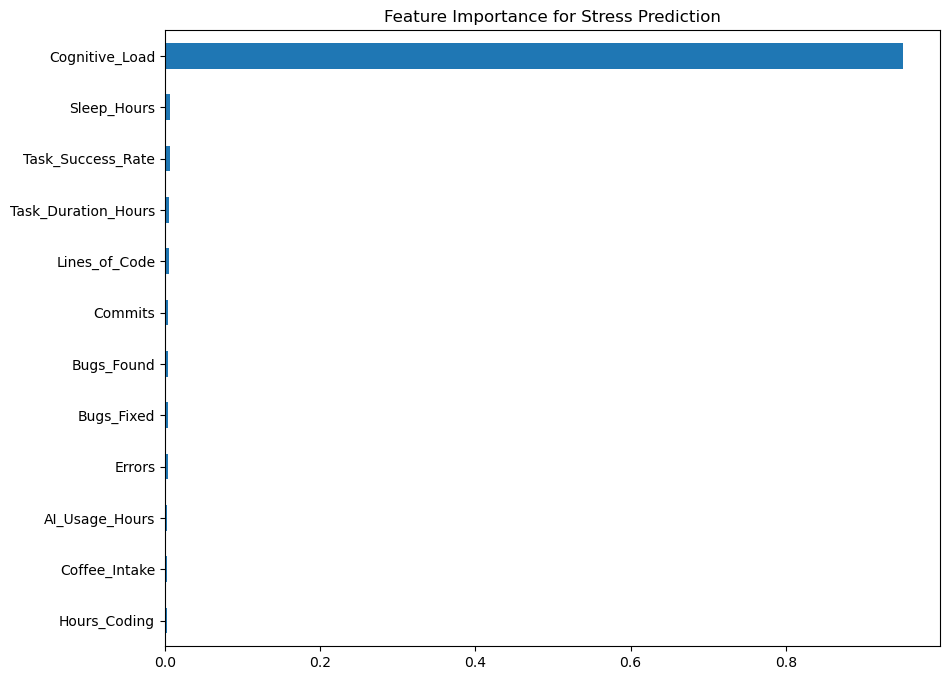

In [17]:
#Feature Importance using barPlot 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Importance for Stress Prediction")
plt.show()


In [19]:
#Predict Stress Level 
new_data = pd.DataFrame({
    "Hours_Coding": [8],
    "Lines_of_Code": [400],
    "Bugs_Found": [10],
    "Bugs_Fixed": [6],
    "AI_Usage_Hours": [4],
    "Sleep_Hours": [5.5],
    "Cognitive_Load": [70],
    "Task_Success_Rate": [50],
    "Coffee_Intake": [3],
    "Task_Duration_Hours": [9],
    "Commits": [20],
    "Errors": [3]
})

new_scaled = scaler.transform(new_data)
prediction = rf.predict(new_scaled)

print("Predicted Stress Level:", prediction[0])


Predicted Stress Level: 80.62089634463517
